# Принятие решений в бизнесе

Вместе с отделом маркетинга в крупном интернет-магазине были подготовлены гипотезы по увеличению выручки.

**Цель**: проанализировать список гипотез для увеличения выручки.

**Задачи**:
+ приоритизировать гипотезы,
+ запустить A/B-тест,
+ проанализировать результаты

**Описание данных:**

Файл */datasets/hypothesis.csv*

+ Hypothesis — краткое описание гипотезы;
+ Reach — охват пользователей по 10-балльной шкале;
+ Impact — влияние на пользователей по 10-балльной шкале;
+ Confidence — уверенность в гипотезе по 10-балльной шкале;
+ Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл */datasets/orders.csv*

+ transactionId — идентификатор заказа;
+ visitorId — идентификатор пользователя, совершившего заказ;
+ date — дата, когда был совершён заказ;
+ revenue — выручка заказа;
+ group — группа A/B-теста, в которую попал заказ.

Файл */datasets/visitors.csv*

+ date — дата;
+ group — группа A/B-теста;
+ visitors — количество пользователей в указанную дату в указанной группе A/B-теста

___

## Чтение файлов и предобработка данных

На данном этапы мы выгрузим информацию о файлах в переменные и сделаем предобработку. Для этого необходимо выполнить несколько пунктов:

+ с помощью методов head() и info() выяснить, нормально ли выгрузили данные и какого типа эти данные
+ преобразовать тип данных при необходимости
+ выявить наличие пропусков и дубликатов.

In [1]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
# записываем в переменные
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
# приведём все названия колонок к змеиному регистру
hypothesis.columns = hypothesis.columns.str.lower().str.replace(' ', '_')

Теперь рассмотрим данные

In [4]:
# посмотрим первые строки каждого датафрейма
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [5]:
# посмотрим первые строки каждого датафрейма
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
# посмотрим первые строки каждого датафрейма
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
# вызовем метод info()

print('Информация о гипотезах:')
hypothesis.info()
print('')
print('Информация о заказах:')
orders.info()
print('')
print('Информация о посетителях:')
visitors.info()

Информация о гипотезах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

Информация о заказах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Информация о посетителях:
<class 'pandas.core.frame.DataFra

По количеству данных можно понять, что пропусков нет. Стоит преобразовать столбцы date к нужному типу.

In [8]:
# преобразуем типы данных в datetime64
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [9]:
# выявим явные дубликаты

print('Количество дубликатов в гипотезах:')
print(hypothesis.duplicated().sum())
print('Количество дубликатов в заказах:')
print(orders.duplicated().sum())
print('Количество дубликатов в посетителях:')
print(visitors.duplicated().sum())

Количество дубликатов в гипотезах:
0
Количество дубликатов в заказах:
0
Количество дубликатов в посетителях:
0


<div style="border:solid green 2px; padding: 20px">
    
        Итак, мы преобразовали необходимые форматы данных и убедились, что в данных нет пропусков и дубликатов.
    
</div>

____

## Приоритизация гипотез

Задачи данного раздела:

+ Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
+ Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
+ Укажать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

In [12]:
# используем параметр max_colwidth для того, чтобы отобразить гипотезы полностью
pd.options.display.max_colwidth = 120
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [13]:
# Применим фреймворк ICE и RICE
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'])
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

Выведем номера гипотез, сами гипотезы, затем значения ICE и RICE

In [14]:
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [15]:
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<div style="border:solid green 2px; padding: 20px">

    Количество затронутых пользователей сильно влияет на результат. 
    Для 7-й гипотезы reach=10, поэтому она выбилась на 1 место в таблице RICE, а вот 
    по параметры ICE она занимала 3-е место. 
    
    Также можно заметить большой разброс значения RICE, это связано с тем, что reach
    в основном либо высокий (10,8) либо низкий(3,2,1). 
    
    Кроме того, в топ-3 осталась только гипотеза 7. Можно для дальнейшего 
    тестирования предложить её.
    
</div>

____

## Анализ A/B-теста

Главной задачей данного раздела будет проанализировать A/B-тест. 


До начала анализа теста изучим имеющиеся данные, а именно:
- сколько у нас групп в АВ-тесте;
- даты начала и окончания теста;
- сколько пользователей в каждой группе - по таблице с заказами;
- не попадают ли какие-то пользователи в обе группы - по таблице с заказами.

In [16]:
print('В тесте участвуют группы:',orders['group'].unique())

В тесте участвуют группы: ['B' 'A']


In [17]:
print('Тест проводится в промежутке от', orders['date'].min().date(), 'до', orders['date'].max().date())

Тест проводится в промежутке от 2019-08-01 до 2019-08-31


Теперь почитаем количество пользователей в разных группах и общее количество пользователей по группам. Сравним эти суммы.

In [18]:
orders.groupby('group')['visitorId'].count()

group
A    557
B    640
Name: visitorId, dtype: int64

In [20]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId'].count()

58

**Итак, у нас 58 повторяющихся пользователей. Но их трогать не обязательно.**

### График кумулятивной выручки по группам

Создадим датафрейм cumulativeData, который будет содержать дату, группу, заказы, покупки, доход и посетителей.

In [21]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Теперь построим график кумулятивной выручки по группам

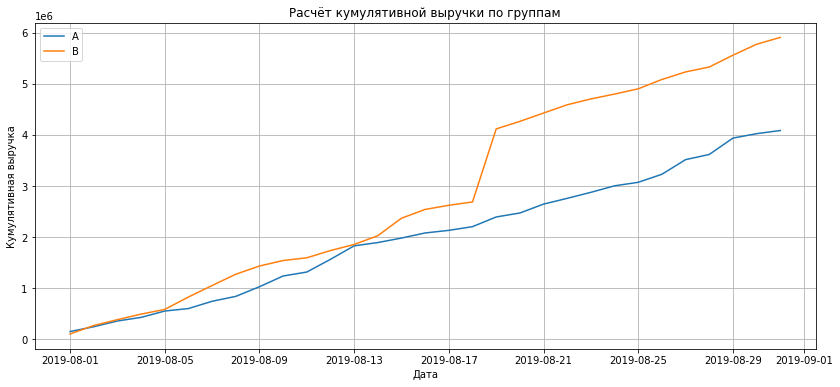

In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# создадим "обложку" графика
plt.figure(figsize=(14,6))
plt.grid()
plt.title('Расчёт кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.show()


**До 13-го числа выручка росла примерно одинаково и небольшим отрывом группы В, однако примерно 19-20 числа, вероятнее всего, произошла большая покупка, которая позволила группе В значильно "оторваться" по продажам**

Так как заказ поднял график больше чем на единицу, стоит понять какой это заказ, чтобы в дальнейшем отслеживать его влияние на ход эксперимента.

Для начала стоит узнать точную дату заказа.

Выведем первые 5 строк, чтобы убедиться, что большой заказ был один.

In [23]:
orders[('2019-08-17' < orders['date']) & (orders['date'] < '2019-08-21') & (orders['group'] == 'B')].sort_values(by='revenue', ascending=False)[:5]

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
751,348143148,689129267,2019-08-20,37150,B
527,1570513684,2837914161,2019-08-19,33405,B
461,2683113224,154576532,2019-08-19,26550,B
630,1329556473,2626290177,2019-08-20,25890,B


**Заказ 425 значительно влияет на кривую кумулятивной выручки группы В. Стоит в дальнейшем следить за влиянием данного заказа на другие показатели.**

###  График кумулятивного среднего чека по группам

Чтобы построить данный график необходимо разделить выручку на количество заказов.

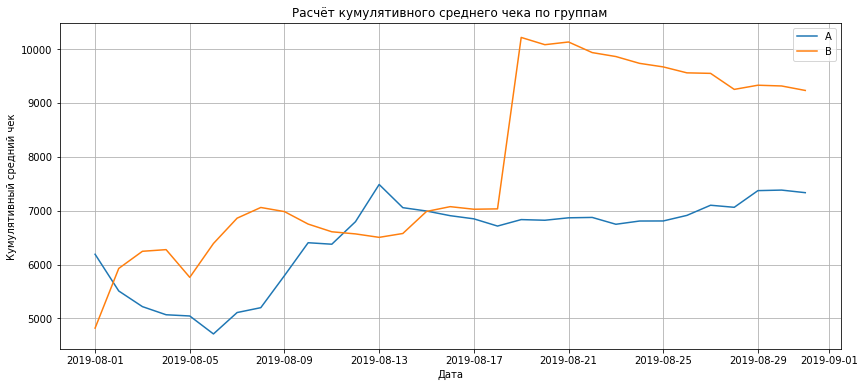

In [24]:
# создадим "обложку" графика
plt.figure(figsize=(14,6))
plt.grid()
plt.title('Расчёт кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')

# построим графики кумулятивного среднего чека по дням
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.show()

+ **График среднего чека уже не так однозначен, как график выручки. Здесь лидером до большого заказа была как группа А (13-го числа), так и группа В (примерно с 3 по 10 числа)**
+ **425 заказ также сильно повлиял на кривую группы В**
+ **После данного заказа средний чек начинает уменьшаться**

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного изменения кумулятивного среднего чека групп

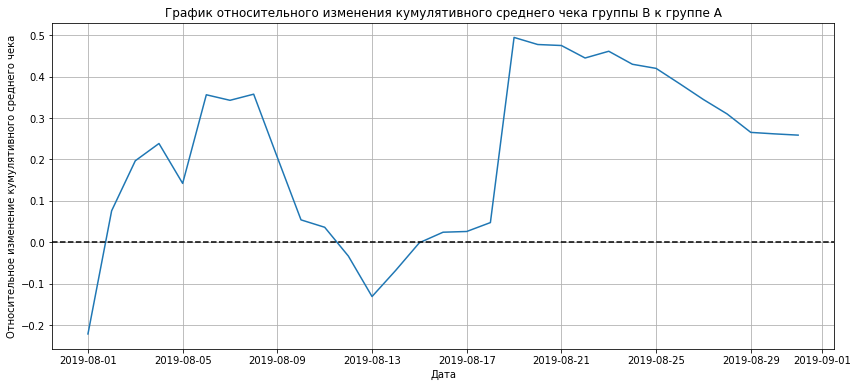

In [25]:
# создадим "обложку" графика
plt.figure(figsize=(14,6))
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кумулятивного среднего чека')

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

+ **По данному графику легко понять, что средний чек группы В почти не был меньше среднего чека группы А и был меньше аналогично предыдущему выводу (примерно 1-го лисла и 13-го числа)**
+ **Влияние 425 заказа по прежнему остаётся значительным**
+ **После большого заказа средний чек уменьшается**

###  График кумулятивного среднего количества заказов по группам

Построим график кумулятивного среднему количества заказов по группам (конверсии).

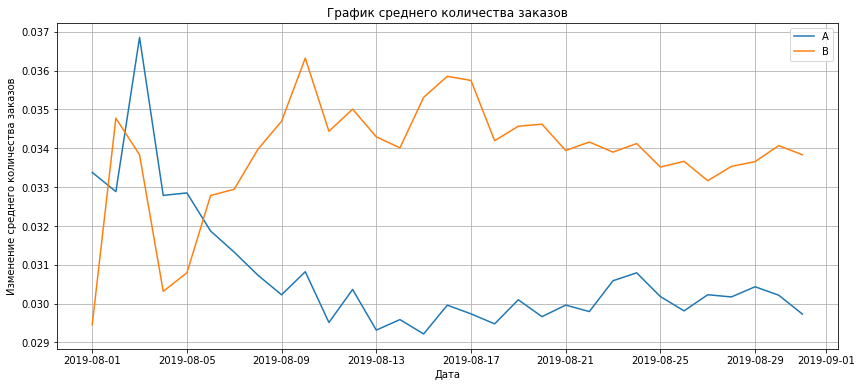

In [26]:
# создадим "обложку" графика
plt.figure(figsize=(14,6))
plt.grid()
plt.title('График среднего количества заказов')
plt.xlabel('Дата')
plt.ylabel('Изменение среднего количества заказов')

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

**До 6-го числа среднее количество заказов неоднозначная. Однако, группа А всё же выше, чем группа В. Однако после 6-го числа группа В стала гараздо выше по количеству заказов, чем группа А. Далее графики идут относительно стабильно (группа В выше группы А), но график группы В постепенно падает.**

### График относительного изменения кумулятивного среднего количества заказов группы B к группе A

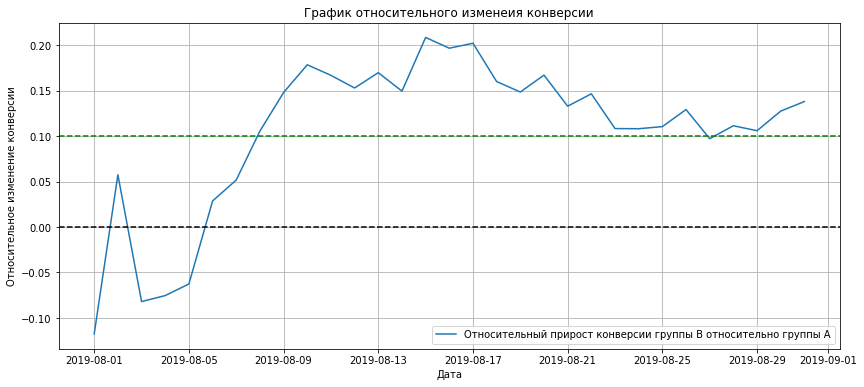

In [27]:
# создадим "обложку" графика
plt.figure(figsize=(14,6))
plt.grid()
plt.title('График относительного изменеия конверсии')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение конверсии')

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='green', linestyle='--')

**Как и в предыдущем графике, можно убедиться, что конверсия группы В почти не была ниже конверсии группы А, однако до 6-го числа она всё же была ниже. После 6-го числа конверсия начала рости, а после 20% начала постепенно уменьшаться, достигая 10%, после чего, вероятно, будет расти до 15%. Также можно заметить, что на протяжении всего теста, примерно с 7-го числа, относительное изменение среднего числа заказов выше 10%**

### Точечный график количества заказов по пользователям

In [28]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


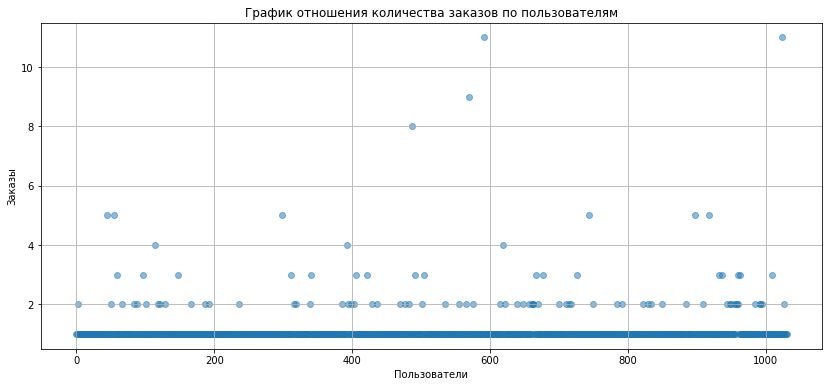

In [29]:
# построим график
x_values = pd.Series(range(0,len(ordersByUsers)))

# создадим "обложку" графика
plt.figure(figsize=(14,6))
plt.grid()
plt.title('График отношения количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')

plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5)

**Из данного графика можно сделать несколько выводов:**
+ **Большая часть пользователей совершили 1 заказ**
+ **Пользователей, совершивших 2 заказа мало, но они есть**
+ **Остальные точки - аномалии, для которых нужно посчитать 95-й и 99-й перцентили**

### 95-й и 99-й перцентили количества заказов на пользователя

In [30]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Для большей точности рассматрим все перцентили.

In [31]:
print(np.percentile(ordersByUsers['orders'], [95, 96, 97, 98, 99])) 

[2. 2. 2. 3. 4.]


**Граница для определения аномальных заказов: 2 заказа, так как 97% процентов пользователей далеют на 1-2 заказа, все остальные значения - выбросы, так как их меньше 5%, ими можно пренебречь.**

###  Точечный график стоимостей заказов

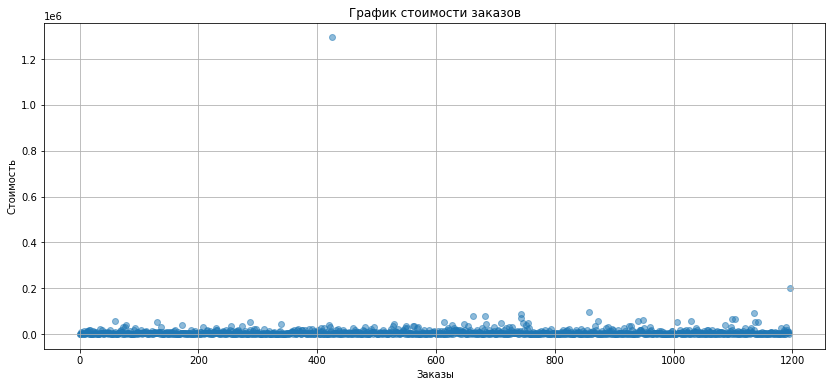

In [32]:
# построим график
x_values = pd.Series(range(0,len(orders['revenue'])))

# создадим "обложку" графика
plt.figure(figsize=(14,6))
plt.grid()
plt.title('График стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость')

plt.scatter(x_values, orders['revenue'], alpha=0.5)

**На графике видно 2 явных выброса. Один из них явно аномальный заказ 425, также есть ещё один на 200000. Для нахождения границы стоимости заказов рассчитаем процентили**

Посмотрим, как выглядит график без явного выброса

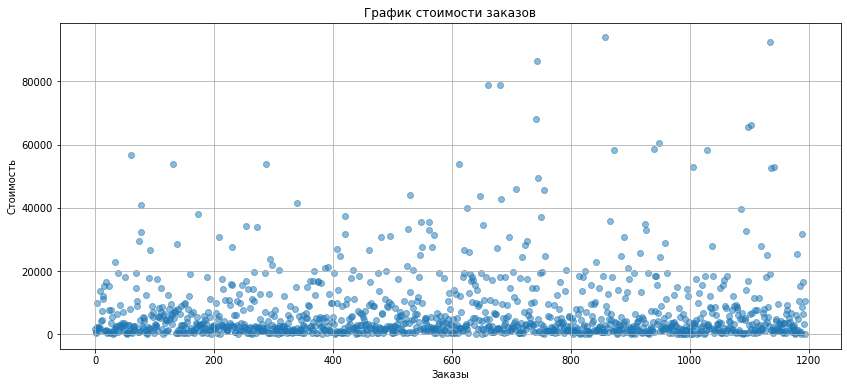

In [33]:
# построим график
x_values = pd.Series(range(0,len(orders[orders['revenue']<=200000]['revenue'])))

# создадим "обложку" графика
plt.figure(figsize=(14,6))
plt.grid()
plt.title('График стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость')

plt.scatter(x_values, orders[orders['revenue']<=200000]['revenue'], alpha=0.5)

**Построив график без выброса стало понятно, что большая часть пользователей совергали покупки в пределах 20 000. Однако, пользователи также совершают покупки до 40 000, далее идёт малое количество пользователей.**

### 95-й и 99-й перцентили стоимости заказов

In [34]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Как и в прошлый раз посмотрим на перцентили подробнее.

In [35]:
print(np.percentile(orders['revenue'], [95, 96, 97, 98, 99])) 

[28000.  31382.  35485.  44133.2 58233.2]


**Между 98% и 99% разница пример 14000. Это достаточно много относительно других значений. Значит можно поставить границей можно 44133,2 (98%).**

### Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным

Чтобы посчитать статистическую значимость различий в среднем числе заказов необходимо собрать все данные в 1 таблицу.

In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [37]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [38]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Применим тест Манна-Уитни.

Сформулируем гипотезы:

+ H0 = {Статистическая значимость различий в среднем количестве заказов между группами отсутстсвует}

+ H1 = {Статистическая значимость различий в среднем количестве заказов между группами присутствует}


In [39]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('alpha', 0.05)

print('p-value {0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное различие в среднем между группами {0:.3f}'.format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

alpha 0.05
p-value 0.01679
Относительное различие в среднем между группами 0.138


**Нулевую гипотезу отвергаем (0,05>0,1679), значит статистическая значимость различий в среднем количестве заказов между группами присутствует. Относительное различие составляет 13,8%**

### Статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

 + H0 = {Cтатистически значимых различий в средних чеках между группами нет}
 
 + H1 = {Есть статистически значимых различий в средних чеках между группами}
 
 Найдём относительные различия в среднем чеке между группами:

In [40]:
print('alpha', 0.05)

print('p-value {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('Относительное различие в среднем между группами {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

alpha 0.05
p-value 0.729
Относительное различие в среднем между группами 0.259


+ **Нулевую гипотезу не отвергаем (0,729 > 0,05). Значит статистически значимых различий в средних чеках между группами нет (средние чеки почти не различны).**

+ **Средний чек группы В больше среднего чека группы А на 25,9%.**

+ **Сразу видно влияние выброса на метрику по существенной разнице между группами**


### Статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным

Приступаем к подготовке очищенных от аномалий данных.

В ходе этого пункта мы:

+ определим столько всего аномалий
+ сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 44133,2 — `usersWithExpensiveOrders`
+ объединим их в таблице `abnormalUsers`

In [41]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 44133.2]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64


In [42]:
print('Всего аномалий:', abnormalUsers.shape[0])

Всего аномалий: 40


Напомню, что ранее были сформулированы 2 гипотезы. Также мы основа применим тест Манна-Уитни.

+ H0 = {Статистическая значимость различий в среднем количестве заказов между группами отсутстсвует}
+ H1 = {Статистическая значимость различий в среднем количестве заказов между группами присутствует}


In [43]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('alpha', 0.05)

print('p-value {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('Относительное различие в среднем между группами {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha 0.05
p-value 0.00740
Относительное различие в среднем между группами 0.185


**Нулевую гипотезу внововь отвергаем. Это значит, что различия есть. При этом Относительная разница между группами увеличилась с 13,8% до 18,5%**

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Теперь определим влияние аномалий на средний чек.

Аналогично пункту 3.11 выдвигаем гипотезы:

+ H0 = {Cтатистически значимых различий в средних чеках между группами нет}

+ H1 = {Есть статистически значимых различий в средних чеках между группами}

In [44]:
print('alpha', 0.05)

print(
    'p-value {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное различие в среднем между группами {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha 0.05
p-value 0.994
Относительное различие в среднем между группами 0.037


**Как и в случае с "сырыми" данными нулевую гипотезу не отвергаем, это значит что существенной разницы в среднем чеке нет. Также сразу можно заметить разницу между отнносительным различием групп. Если ранее чек группы В был больше 25,9%, то сейчас всего лишь на 3,7%. Это значит, что влияение заказа 425 было очень велико.**

<div style="border:solid green 2px; padding: 20px">
    
    В результате можно остановить тест и зафиксировать победу группы В. Такое решение вполне однозначно, так как группа В эффективнее из-за конверсии, хотя средний чек (без аномалий) примерно однаковый, но с небольшим отрывом группы В.
    
</div>

___

## Выводы

В ходе работы были проделы следующие шаги:

+ Совершена предобработка данных
+ Приоритизированы гипотезы
+ Запущен А/В тест

<div style="border:solid green 2px; padding: 20px">
    
    1. Разница в среднем количестве заказов (конверсии) есть и в "сырых" и в "чистых" данных.
    2. Разницы между чеками практически нет.
    3. 425 заказ, который значительно поднял средний чек 19 числа, мог бы сильно исказить данные, если бы не был проведён А/В тест.
    4. По итогу, выиграла группа В за счёт большего среднее количество заказов.
    
</div>